In [161]:
sklearn_version = sklearn.__version__

print(sklearn_version)

0.22.2.post1


In [ ]:
#for extracting the data
!pip install lz4

     |████████████████████████████████| 1.8 MB 5.4 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns


import os
import lz4
import matplotlib.pylab as plt
from io import BytesIO


In [ ]:
chunk_list=[]#init


from lz4 import frame

#we will read the file chunk by chunk because it's too big
with frame.open('train.lz4', mode='r') as fp:
  chunk_size=1024*28*28
  output_data = fp.read(size=chunk_size)
  df_chunk=pd.read_csv(BytesIO(output_data))
  chunk_list.append(df_chunk)


df_train = pd.concat(chunk_list)









In [156]:
df_train.dtypes

dataset_type                                          |S8
demand                                              int64
departure_date                             datetime64[ns]
destination_current_public_holiday                  int64
destination_current_school_holiday                  int64
destination_days_to_next_public_holiday             int64
destination_days_to_next_school_holiday             int64
destination_station_name                              |S3
od_destination_time                                 int64
od_number_of_similar_12_hours                       int64
od_number_of_similar_2_hours                        int64
od_number_of_similar_4_hours                        int64
od_origin_month                                     int64
od_origin_time                                      int64
od_origin_week                                      int64
od_origin_weekday                                   int64
od_travel_time_minutes                              int64
origin_current

In [141]:
df_train['sale_date'] = pd.to_datetime(df_train['sale_date'])
df_train['departure_date'] = pd.to_datetime(df_train['departure_date'])

In [151]:
df_train['dataset_type']=df_train['dataset_type'].astype("|S")


In [ ]:
df_train.dtypes

In [153]:

df_train['origin_station_name'] = df_train['origin_station_name'].astype("|S")
df_train['destination_station_name'] = df_train['destination_station_name'].astype("|S")

In [ ]:
#we'll do the same for the test dataset

with frame.open('test.lz4', mode='r') as fp:
  chunk_size=1024*28*28
  output_data = fp.read(size=chunk_size)
  df_chunk=pd.read_csv(BytesIO(output_data))
  chunk_list.append(df_chunk)


df_test = pd.concat(chunk_list)



In [158]:

df_test['sale_date'] = pd.to_datetime(df_train['sale_date'])
df_test['departure_date'] = pd.to_datetime(df_train['departure_date'])
df_test['origin_station_name'] = df_test['origin_station_name'].astype("|S")
df_test['destination_station_name'] = df_test['destination_station_name'].astype("|S")

In [160]:
df_test.dtypes

dataset_type                                       object
demand                                              int64
departure_date                             datetime64[ns]
destination_current_public_holiday                  int64
destination_current_school_holiday                  int64
destination_days_to_next_public_holiday             int64
destination_days_to_next_school_holiday             int64
destination_station_name                              |S3
od_destination_time                                 int64
od_number_of_similar_12_hours                       int64
od_number_of_similar_2_hours                        int64
od_number_of_similar_4_hours                        int64
od_origin_month                                     int64
od_origin_time                                      int64
od_origin_week                                      int64
od_origin_weekday                                   int64
od_travel_time_minutes                              int64
origin_current

In [ ]:
#Data analysis for df_train
df=df_train

In [ ]:
num_cols = df._get_numeric_data().columns
col_cat=list(set(df.columns)-set(num_cols))
print(num_cols)
print(col_cat)

Index(['demand', 'destination_current_public_holiday',
       'destination_current_school_holiday',
       'destination_days_to_next_public_holiday',
       'destination_days_to_next_school_holiday', 'od_destination_time',
       'od_number_of_similar_12_hours', 'od_number_of_similar_2_hours',
       'od_number_of_similar_4_hours', 'od_origin_month', 'od_origin_time',
       'od_origin_week', 'od_origin_weekday', 'od_origin_year',
       'od_travel_time_minutes', 'origin_current_public_holiday',
       'origin_current_school_holiday', 'origin_days_to_next_public_holiday',
       'origin_days_to_next_school_holiday', 'price', 'sale_day', 'sale_day_x',
       'sale_month', 'sale_week', 'sale_weekday', 'sale_year'],
      dtype='object')
['destination_station_name', 'departure_date', 'sale_date', 'origin_station_name', 'dataset_type']


#  I- A quick look into the training dataset




In [ ]:
df.head()


,dataset_type,demand,departure_date,destination_current_public_holiday,destination_current_school_holiday,destination_days_to_next_public_holiday,destination_days_to_next_school_holiday,destination_station_name,od_destination_time,od_number_of_similar_12_hours,od_number_of_similar_2_hours,od_number_of_similar_4_hours,od_origin_month,od_origin_time,od_origin_week,od_origin_weekday,od_origin_year,od_travel_time_minutes,origin_current_public_holiday,origin_current_school_holiday,origin_days_to_next_public_holiday,origin_days_to_next_school_holiday,origin_station_name,price,sale_date,sale_day,sale_day_x,sale_month,sale_week,sale_weekday,sale_year
0,training,1,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-02,2,-89.0,12.0,6.0,6.0,2018.0
1,training,6,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-03,3,-88.0,12.0,0.0,0.0,2018.0
2,training,5,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-04,4,-87.0,12.0,1.0,1.0,2018.0
3,training,0,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-05,5,-86.0,12.0,2.0,2.0,2018.0
4,training,0,2019-03-01,0,1,52,-13,ag,1088,5,1,2,3,922,9,4,2019,166,0,1,52,-6,cpe,26.65,2018-12-06,6,-85.0,12.0,3.0,3.0,2018.0


In [ ]:
df.describe


<bound method NDFrame.describe of      dataset_type  demand departure_date  ...  sale_week  sale_weekday  sale_year
0        training       1     2019-03-01  ...        6.0           6.0     2018.0
1        training       6     2019-03-01  ...        0.0           0.0     2018.0
2        training       5     2019-03-01  ...        1.0           1.0     2018.0
3        training       0     2019-03-01  ...        2.0           2.0     2018.0
4        training       0     2019-03-01  ...        3.0           3.0     2018.0
...           ...     ...            ...  ...        ...           ...        ...
7000     training       4     2019-03-05  ...        0.0           0.0     2019.0
7001     training      15     2019-03-05  ...        1.0           1.0     2019.0
7002     training       9     2019-03-05  ...        3.0           3.0     2019.0
7003     training       2     2019-03-05  ...        4.0           4.0     2019.0
7004     training       7     2019-03-05  ...        NaN        

In [155]:
df.dtypes

dataset_type                                object
demand                                       int64
departure_date                              object
destination_current_public_holiday           int64
destination_current_school_holiday           int64
destination_days_to_next_public_holiday      int64
destination_days_to_next_school_holiday      int64
destination_station_name                    object
od_destination_time                          int64
od_number_of_similar_12_hours                int64
od_number_of_similar_2_hours                 int64
od_number_of_similar_4_hours                 int64
od_origin_month                              int64
od_origin_time                               int64
od_origin_week                               int64
od_origin_weekday                            int64
od_origin_year                               int64
od_travel_time_minutes                       int64
origin_current_public_holiday                int64
origin_current_school_holiday  

In [ ]:
df.isnull().sum()


dataset_type                               0
demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_sta

#Categorical data distribution

In [ ]:
#@title

plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


#Pie plots 
fig = plt.figure(figsize=(16, 8))

for col in col_cat:
    ax=px.pie(df, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
 
fig.savefig('catdata.png', transparent=True)
plt.show()

<Figure size 1152x576 with 0 Axes>

In [ ]:
#We remove the null values
df = df.dropna()


In [ ]:
df.isnull().sum()


dataset_type                               0
demand                                     0
departure_date                             0
destination_current_public_holiday         0
destination_current_school_holiday         0
destination_days_to_next_public_holiday    0
destination_days_to_next_school_holiday    0
destination_station_name                   0
od_destination_time                        0
od_number_of_similar_12_hours              0
od_number_of_similar_2_hours               0
od_number_of_similar_4_hours               0
od_origin_month                            0
od_origin_time                             0
od_origin_week                             0
od_origin_weekday                          0
od_origin_year                             0
od_travel_time_minutes                     0
origin_current_public_holiday              0
origin_current_school_holiday              0
origin_days_to_next_public_holiday         0
origin_days_to_next_school_holiday         0
origin_sta

In [ ]:
df=df.drop(columns=['sale_year',])

In [ ]:
df.shape


(7004, 31)

In [ ]:
#There is no duplicates in the dataset
df = df.drop_duplicates()
df.shape

(7004, 31)

#The distribution of the prices

In [ ]:
df['price'].describe()

count    7004.000000
mean       20.717961
std        14.704144
min        11.650000
25%        11.650000
50%        11.650000
75%        26.650000
max       116.650000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



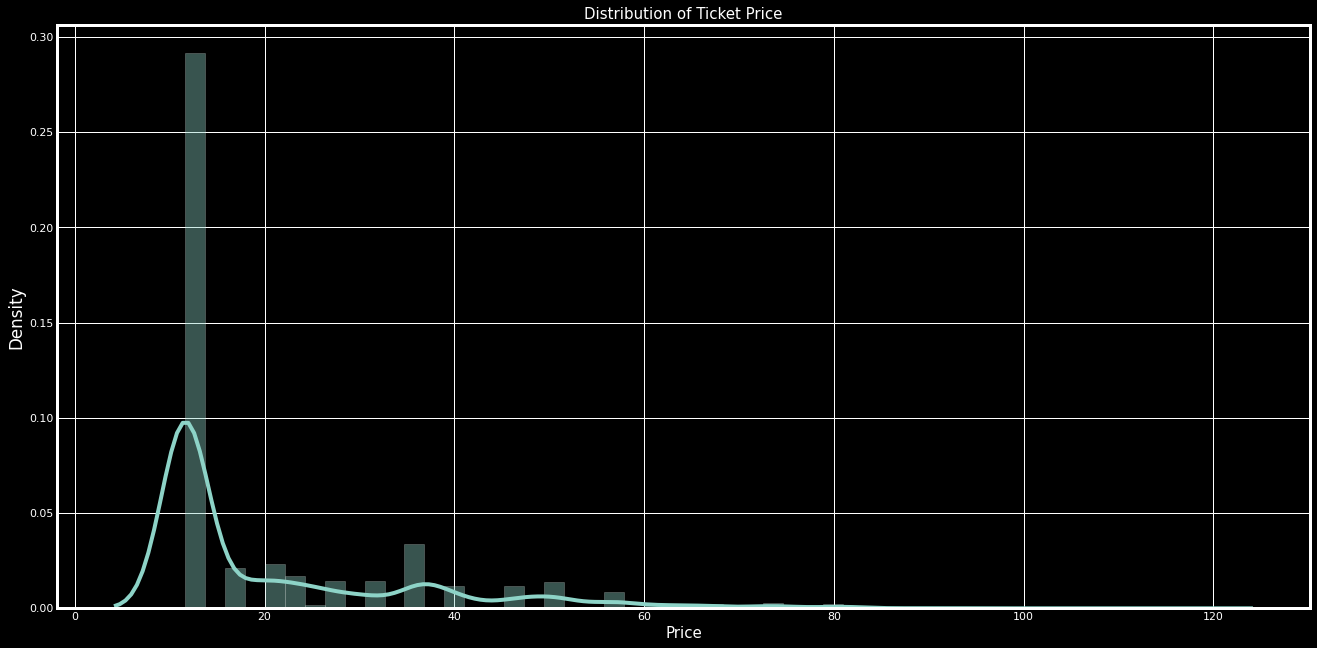

In [ ]:
plt.figure(figsize=(20, 10))
sns.distplot(a=df['price'])
plt.xlabel('Price', fontsize=15)
plt.title('Distribution of Ticket Price', fontsize=15)

plt.show()

**We notice that the price values are more concentrated around 12 euros, the second peak of density is observed around 35 euros.**





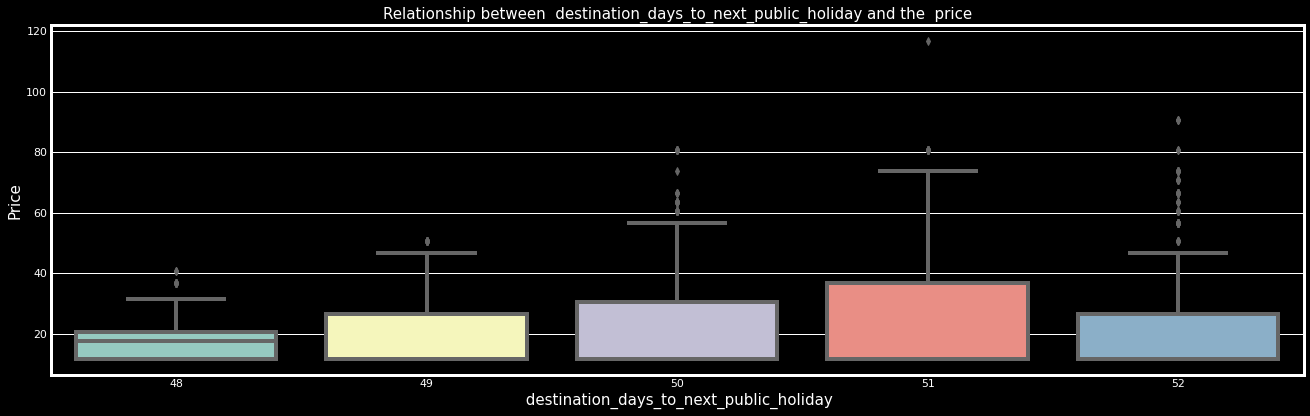

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='destination_days_to_next_public_holiday', y='price', data=df)
plt.title('Relationship between  destination_days_to_next_public_holiday and the  price', fontsize=15)
plt.xlabel(' destination_days_to_next_public_holiday', fontsize=15)
plt.ylabel('Price', fontsize=15)


plt.show()

**We notice that the price values increase overall as the number of days between the arrival date and the next/current holiday date in the destination city goes up.**





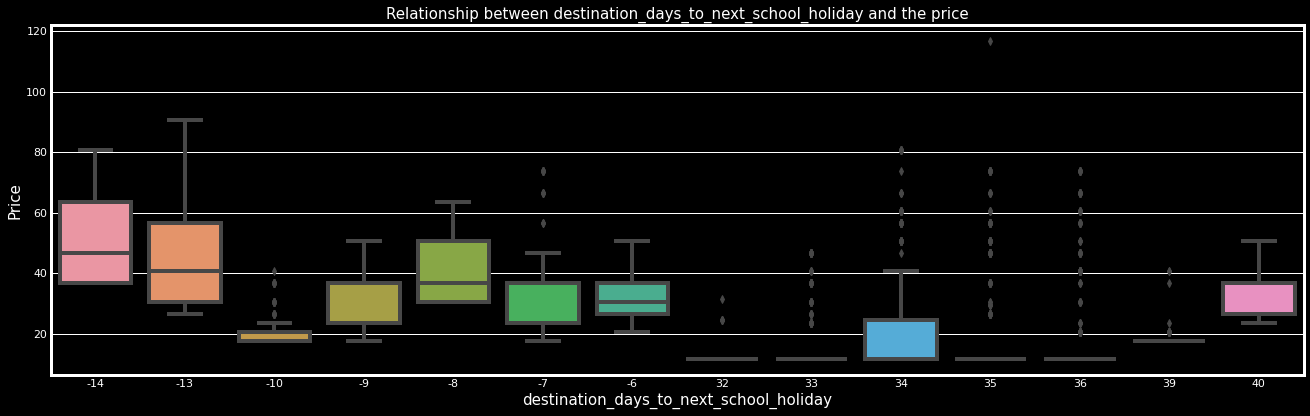

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='destination_days_to_next_school_holiday', y='price', data=df)
plt.title('Relationship between destination_days_to_next_school_holiday and the price', fontsize=15)
plt.xlabel('destination_days_to_next_school_holiday', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

**Similarly, it seems that there is a correlation  between the ticket price and the number of days between the arrival date and the next/current school holiday date in destiantion city. In deed, the median price is the highest (up to 40-45 euros) when the arrival coincides with a school holiday.**





In [ ]:
df.demand.describe()

count    7004.000000
mean        2.416048
std         6.741929
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       140.000000
Name: demand, dtype: float64

In [ ]:
#Most of the demand amount is around 3

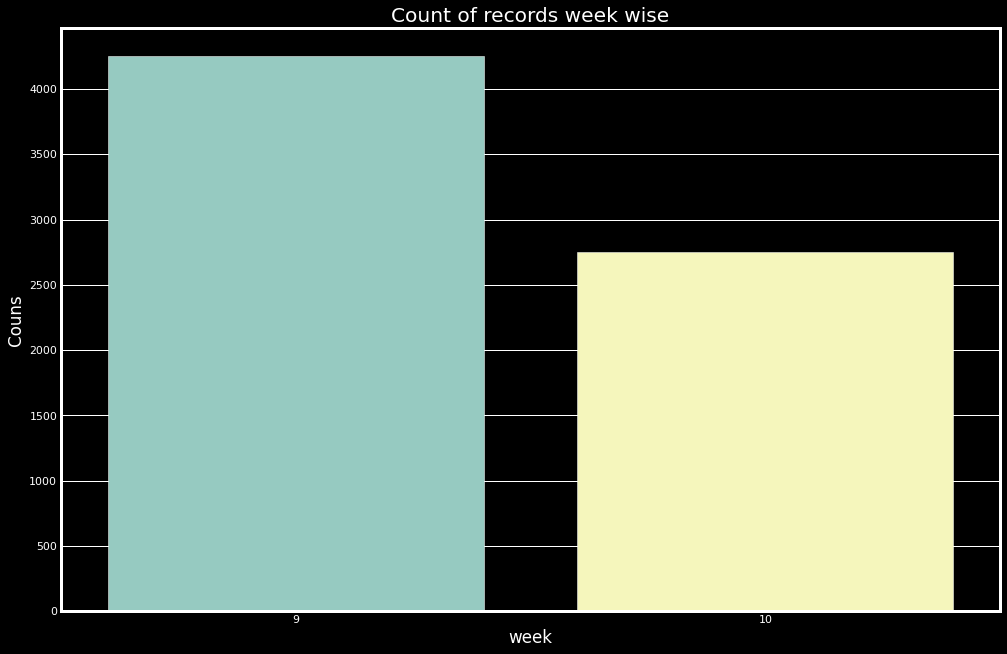

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of records week wise')
ax=sns.countplot(x = 'od_origin_week', data = df)
plt.xlabel('week')
plt.ylabel('Couns')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

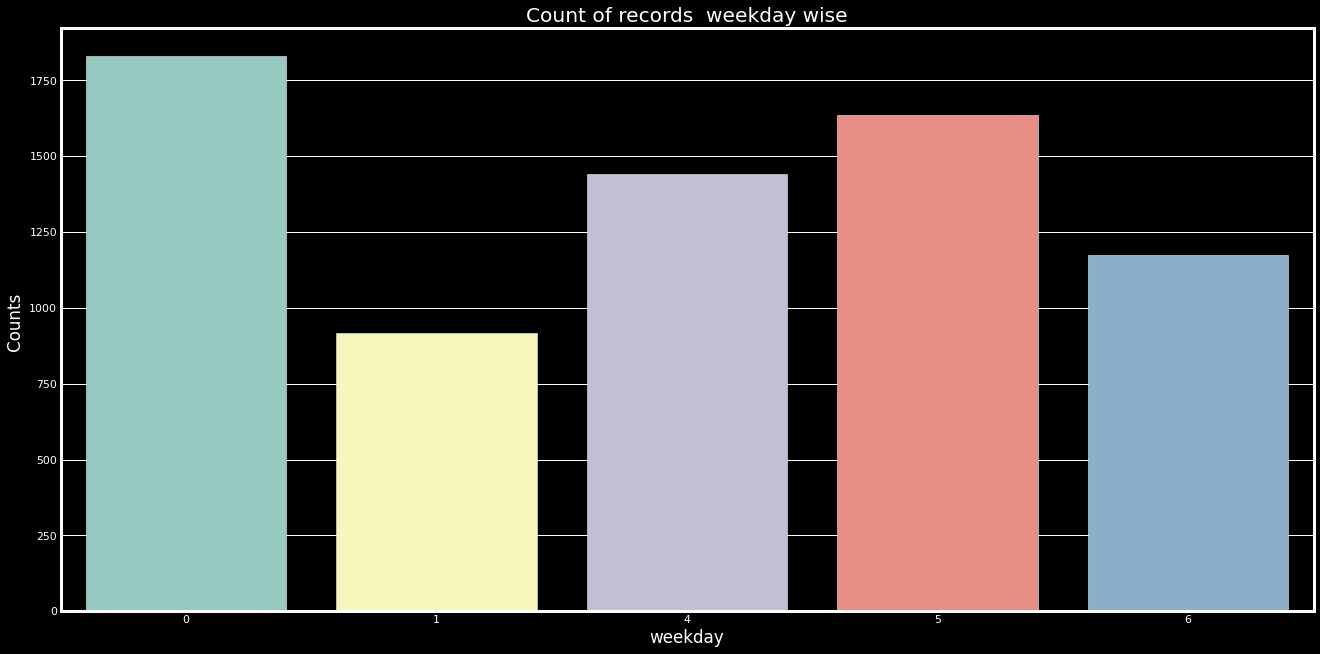

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Count of records  weekday wise')
ax=sns.countplot(x = 'od_origin_weekday', data = df)
plt.xlabel('weekday')
plt.ylabel('Counts ')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

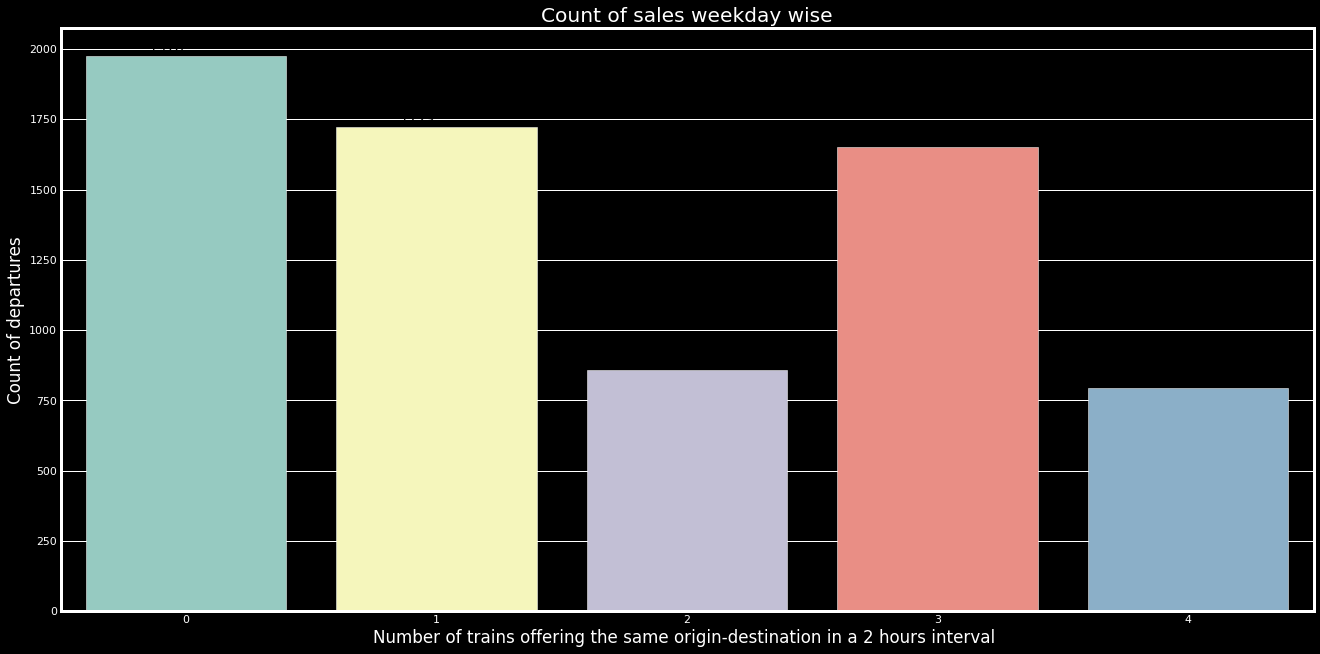

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales weekday wise')
ax=sns.countplot(x = 'od_number_of_similar_2_hours', data = df)
plt.xlabel('Number of trains offering the same origin-destination in a 2 hours interval ')
plt.ylabel('Count of departures')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

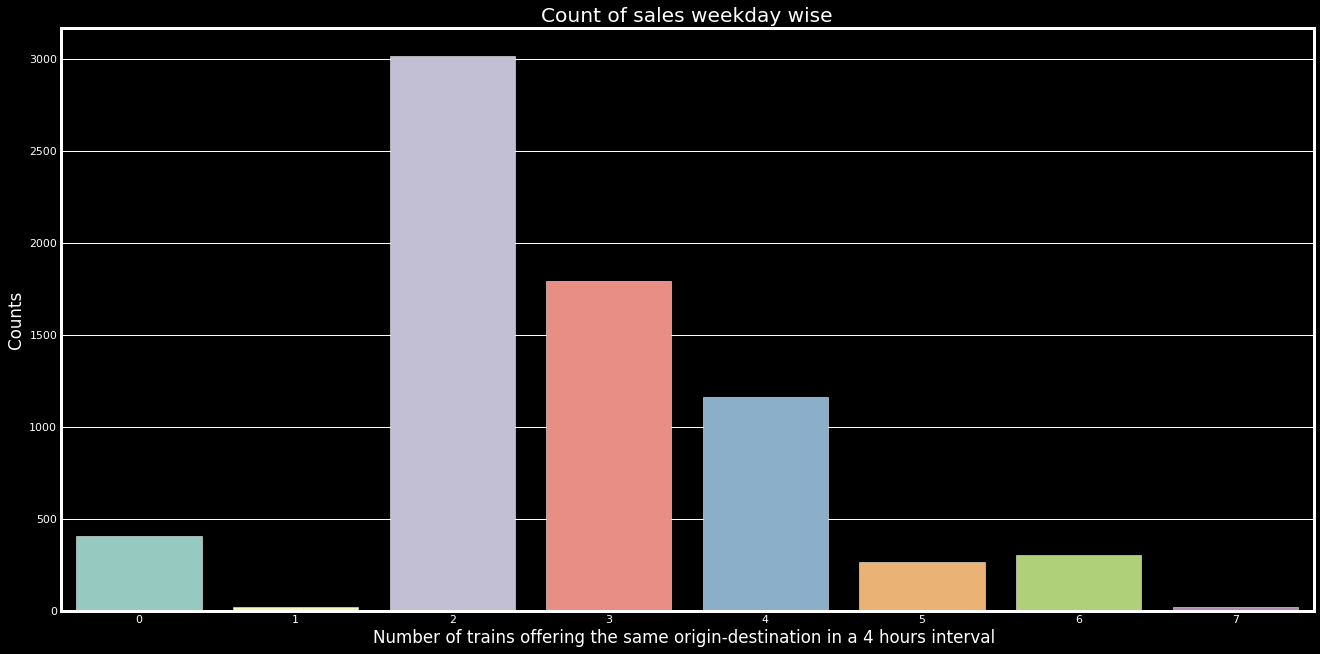

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales weekday wise')
ax=sns.countplot(x = 'od_number_of_similar_4_hours', data = df)
plt.xlabel('Number of trains offering the same origin-destination in a 4 hours interval ')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

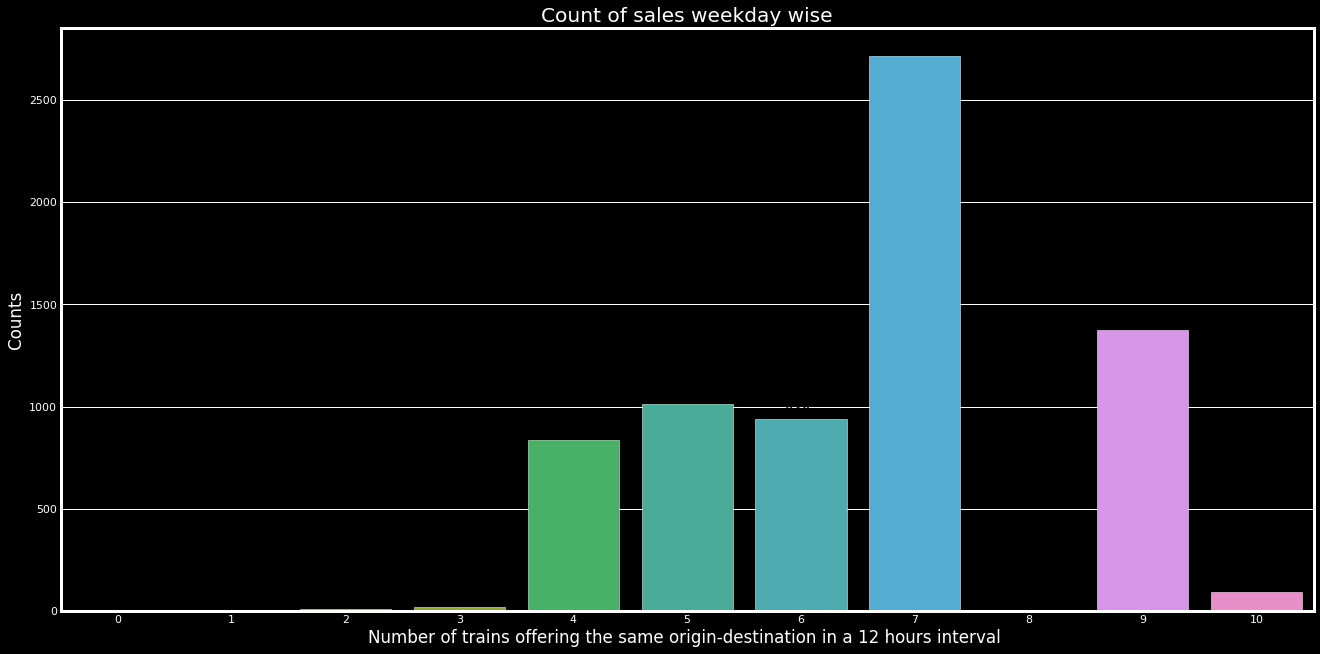

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Count of sales weekday wise')
ax=sns.countplot(x = 'od_number_of_similar_12_hours', data = df)
plt.xlabel('Number of trains offering the same origin-destination in a 12 hours interval ')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [ ]:
df.columns

Index(['dataset_type', 'demand', 'departure_date',
       'destination_current_public_holiday',
       'destination_current_school_holiday',
       'destination_days_to_next_public_holiday',
       'destination_days_to_next_school_holiday', 'destination_station_name',
       'od_destination_time', 'od_number_of_similar_12_hours',
       'od_number_of_similar_2_hours', 'od_number_of_similar_4_hours',
       'od_origin_month', 'od_origin_time', 'od_origin_week',
       'od_origin_weekday', 'od_origin_year', 'od_travel_time_minutes',
       'origin_current_public_holiday', 'origin_current_school_holiday',
       'origin_days_to_next_public_holiday',
       'origin_days_to_next_school_holiday', 'origin_station_name', 'price',
       'sale_date', 'sale_day', 'sale_day_x', 'sale_month', 'sale_week',
       'sale_weekday', 'sale_year'],
      dtype='object')

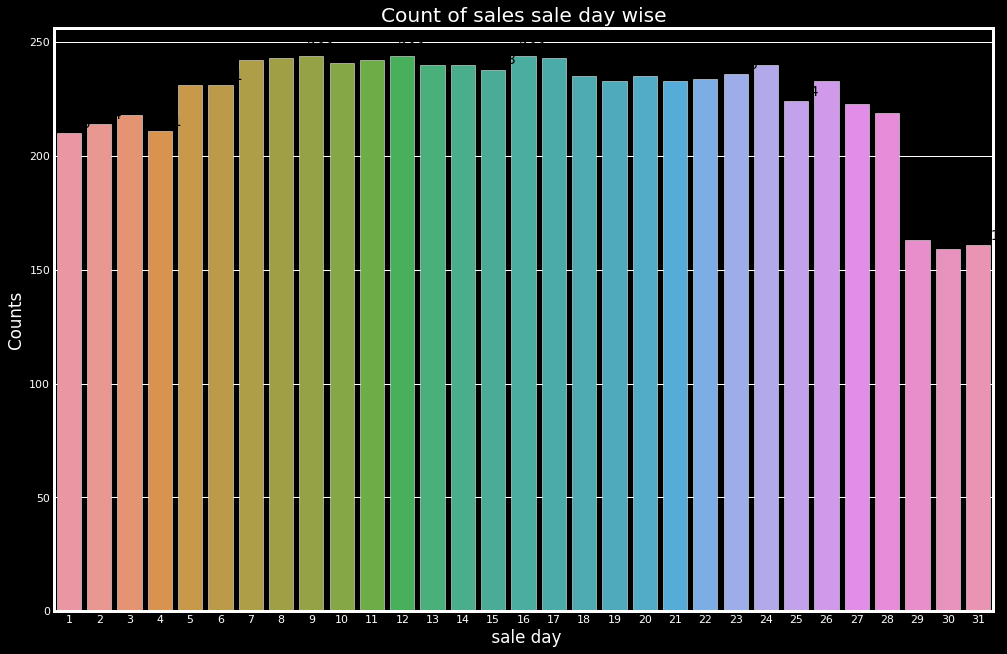

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales sale day wise')
ax=sns.countplot(x = 'sale_day', data = df)
plt.xlabel(' sale day')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

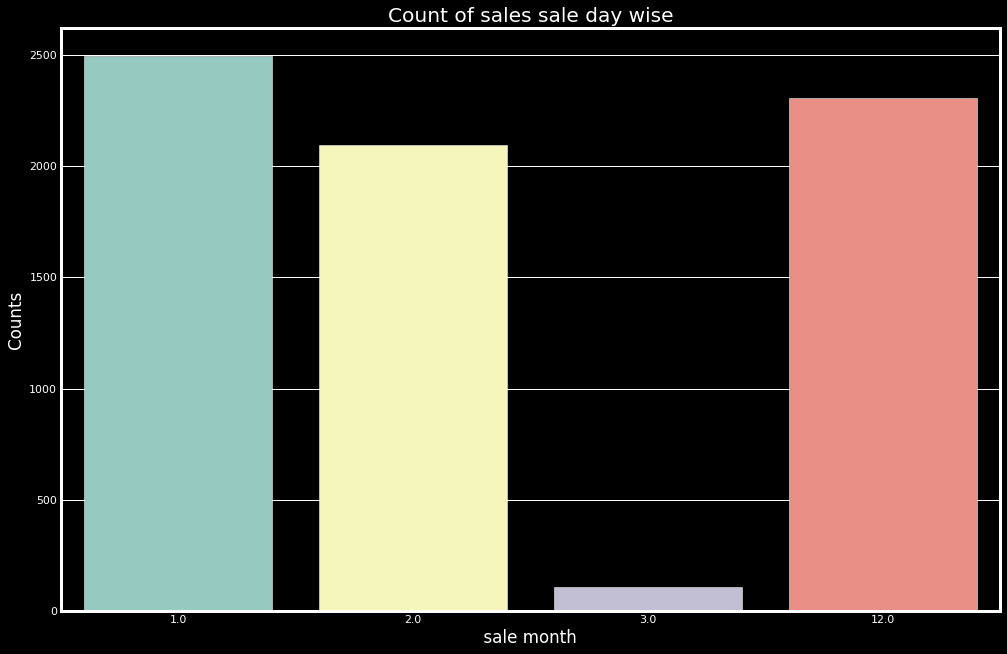

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales sale day wise')
ax=sns.countplot(x = 'sale_month', data = df)
plt.xlabel(' sale month ')
plt.ylabel('Counts')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

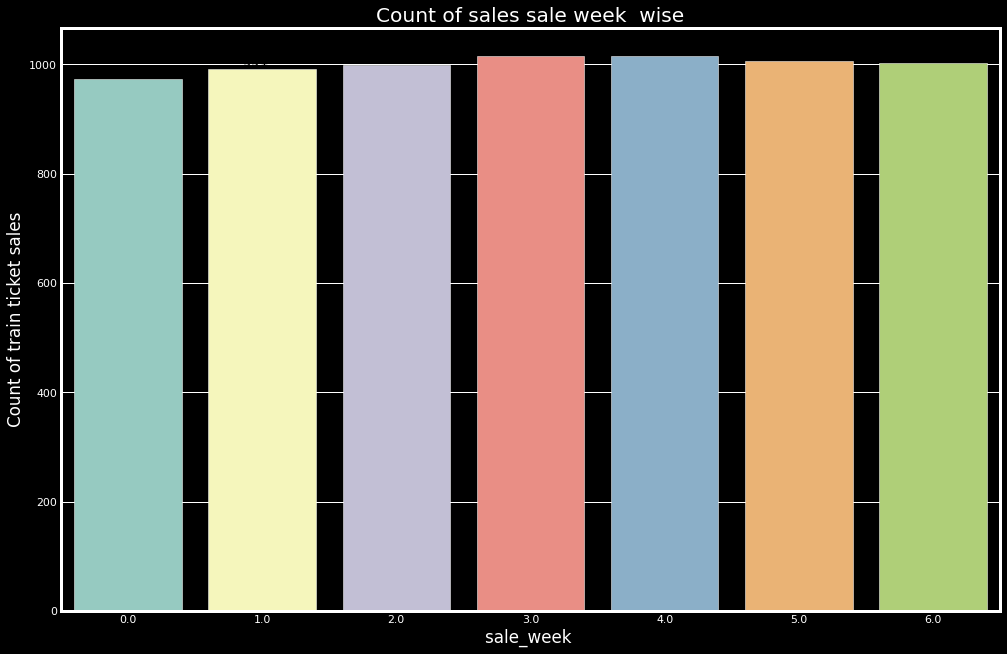

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Count of sales sale week  wise')
ax=sns.countplot(x = 'sale_week', data = df)
plt.xlabel('sale_week ')
plt.ylabel('Count of train ticket sales')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
num_cols = df._get_numeric_data().columns
col_cat=list(set(df.columns)-set(num_cols))
print(num_cols)
print(col_cat)

Index(['demand', 'destination_current_public_holiday',
       'destination_current_school_holiday',
       'destination_days_to_next_public_holiday',
       'destination_days_to_next_school_holiday', 'od_destination_time',
       'od_number_of_similar_12_hours', 'od_number_of_similar_2_hours',
       'od_number_of_similar_4_hours', 'od_origin_month', 'od_origin_time',
       'od_origin_week', 'od_origin_weekday', 'od_origin_year',
       'od_travel_time_minutes', 'origin_current_public_holiday',
       'origin_current_school_holiday', 'origin_days_to_next_public_holiday',
       'origin_days_to_next_school_holiday', 'price', 'sale_day', 'sale_day_x',
       'sale_month', 'sale_week', 'sale_weekday', 'sale_year'],
      dtype='object')
['destination_station_name', 'origin_station_name', 'departure_date', 'dataset_type', 'sale_date']


In [ ]:
df['destination_current_school_holiday']

0       1
1       1
2       1
3       1
4       1
       ..
6999    1
7000    1
7001    1
7002    1
7003    1
Name: destination_current_school_holiday, Length: 7004, dtype: int64

#Correlation between features

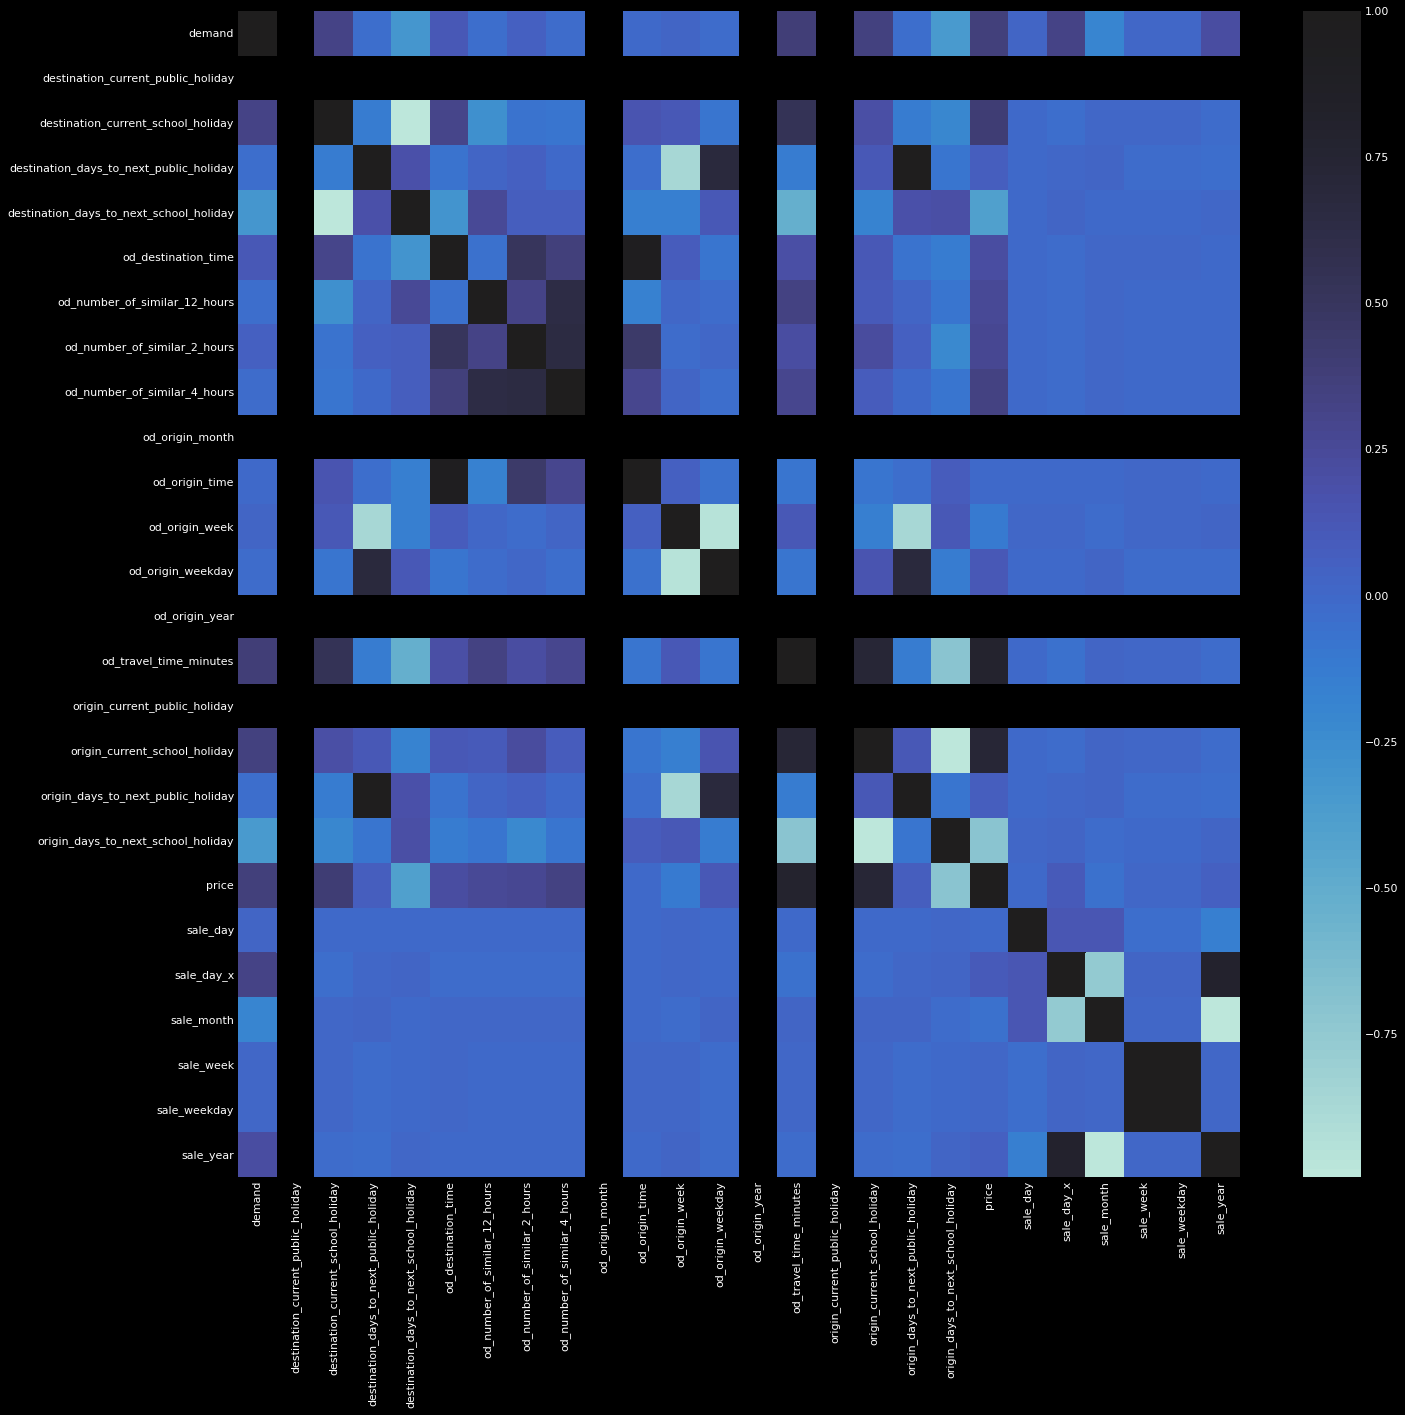

In [ ]:

#@title

fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),center=True)
fig.savefig('multivariateanalysis.png', transparent=False)

# We notice on the colored map, there is strong correlation of  the price  with  origin_current_school_holiday variable as well as of_cuurent_public_holiday and destination_current_school_holiday.
#As for the demand, it has a strong correlation with the travel duration as well as the sale_day, the destination_days_to_next_public_holiday

In [ ]:
df_clean=df
df_clean['date_time'] = pd.to_datetime(df_clean['departure_date'])
df_clean['day'] = df_clean['date_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_clean['hour'] = df_clean['date_time'].apply(lambda x: x.hour)
df_clean['day_name'] = df_clean['date_time'].apply(lambda y: y.dayofweek)
df_clean['week'] = df_clean['date_time'].apply(lambda y: y.week)
df_clean['year'] = df_clean['date_time'].apply(lambda y: y.year)

In [ ]:
df_clean['date_time_sale'] = pd.to_datetime(df_clean['sale_date'])
df_clean['day_sale'] = df_clean['date_time_sale'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_clean['hour_sale'] = df_clean['date_time_sale'].apply(lambda x: x.hour)
df_clean['day_name_sale'] = df_clean['date_time_sale'].apply(lambda y: y.dayofweek)
df_clean['week_sale'] = df_clean['date_time_sale'].apply(lambda y: y.week)
df_clean['year_sale'] = df_clean['date_time_sale'].apply(lambda y: y.year)

In [ ]:
df_clean.columns

Index(['dataset_type', 'demand', 'departure_date',
       'destination_current_public_holiday',
       'destination_current_school_holiday',
       'destination_days_to_next_public_holiday',
       'destination_days_to_next_school_holiday', 'destination_station_name',
       'od_destination_time', 'od_number_of_similar_12_hours',
       'od_number_of_similar_2_hours', 'od_number_of_similar_4_hours',
       'od_origin_month', 'od_origin_time', 'od_origin_week',
       'od_origin_weekday', 'od_origin_year', 'od_travel_time_minutes',
       'origin_current_public_holiday', 'origin_current_school_holiday',
       'origin_days_to_next_public_holiday',
       'origin_days_to_next_school_holiday', 'origin_station_name', 'price',
       'sale_date', 'sale_day', 'sale_day_x', 'sale_month', 'sale_week',
       'sale_weekday', 'sale_year', 'date_time', 'day', 'hour', 'day_name',
       'week', 'year', 'date_time_sale', 'day_sale', 'hour_sale',
       'day_name_sale', 'week_sale', 'year_sale'],
  

In [ ]:
df_clean['index']=df_clean.index

In [ ]:
df_clean['day']

0       2019-03-01
1       2019-03-01
2       2019-03-01
3       2019-03-01
4       2019-03-01
           ...    
6999    2019-03-05
7000    2019-03-05
7001    2019-03-05
7002    2019-03-05
7003    2019-03-05
Name: day, Length: 7004, dtype: object

#Mean demand evolution as a function of the travel duration





---



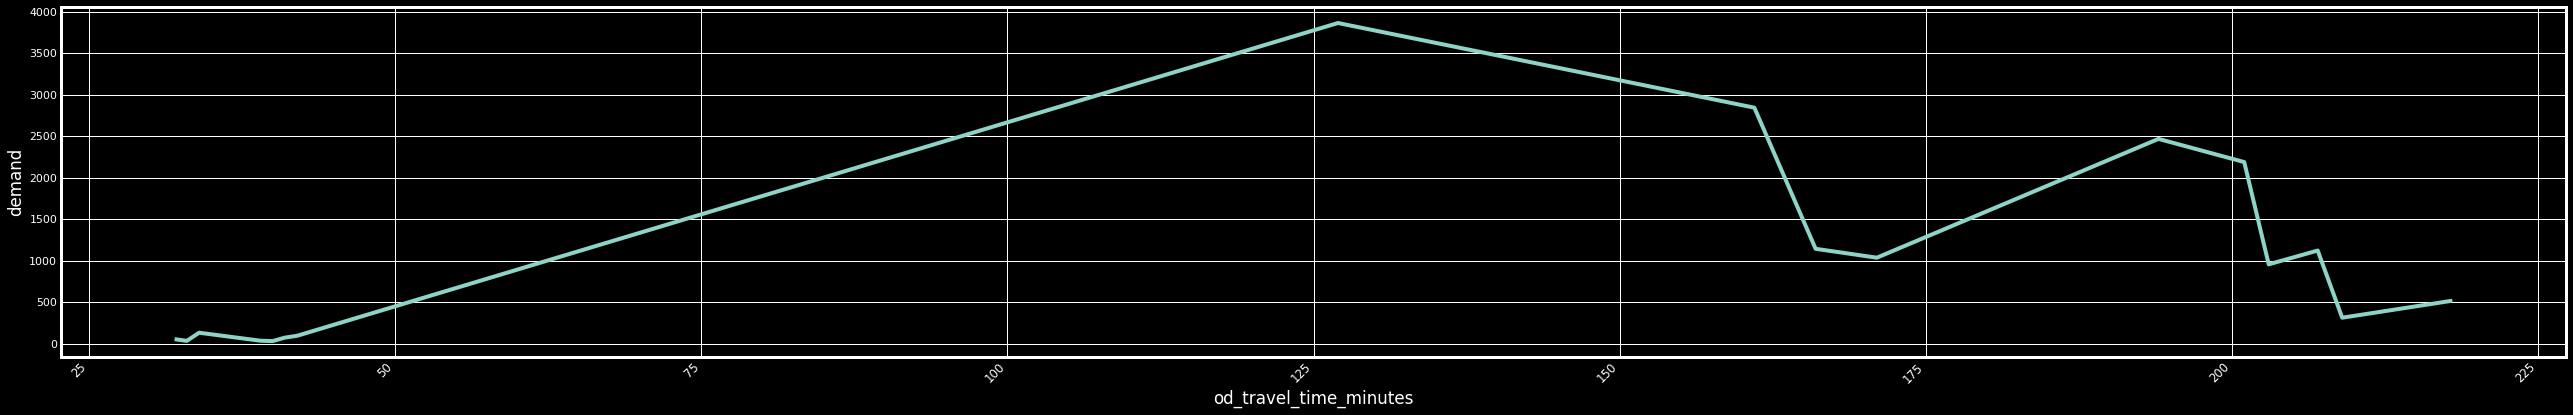

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['od_travel_time_minutes','demand','index']].groupby(['od_travel_time_minutes']).sum() #makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'od_travel_time_minutes',y = 'demand', data=demand_by_day)

#Price and demand evolution as a function of the number of days remaining before the departure( sale_day_x)

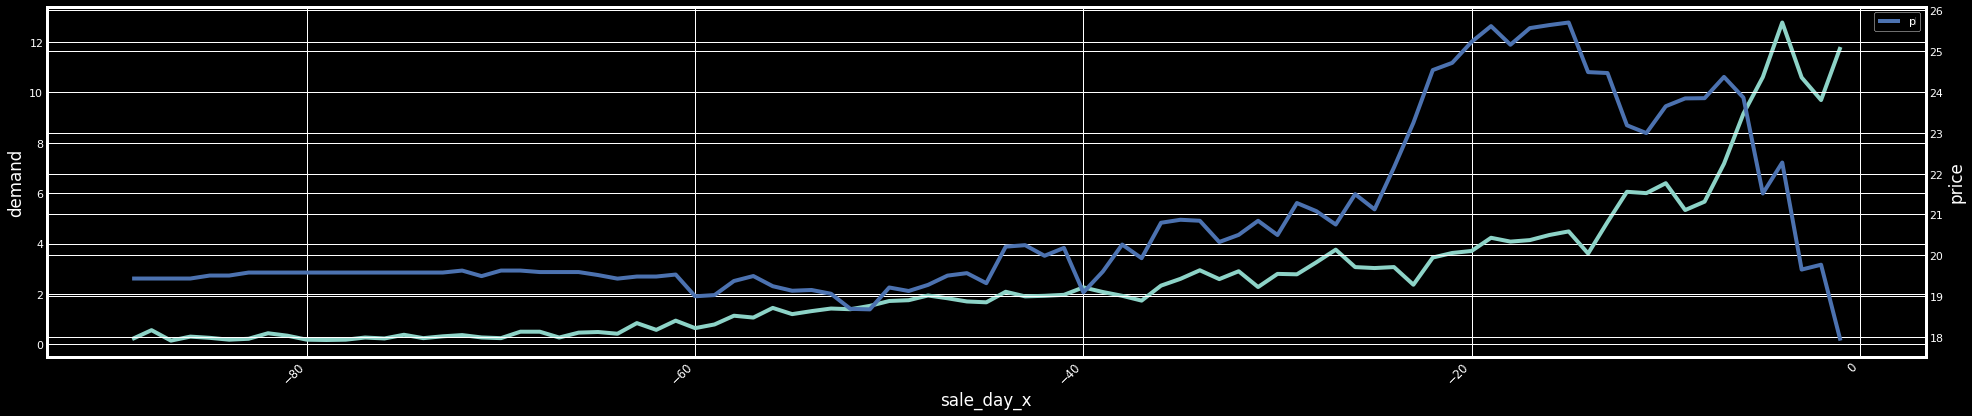

In [ ]:
plt.figure(figsize=(30, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['sale_day_x','demand','index','price']].groupby(['sale_day_x']).mean()#makes sense
demand_by_day = demand_by_day.reset_index()
ax=sns.lineplot(x = 'sale_day_x',y = 'demand', data=demand_by_day)
ax.legend('demand')
#sns.lineplot(x = 'sale_day_x',y = 'price', data=demand_by_day).set(title='Demand and price evolutions as a function of sale_day_x')
ax2 = plt.twinx()
ax3=sns.lineplot(x='sale_day_x',y='price',data=demand_by_day, color="b", ax=ax2)
ax2.legend('price')



#Both the demand and the price increase constantly until about 3 weeks before the departure.  The demand reaches its peak at 17 days before the train departure and then decreases very fast.  Meanwhile the price keeps increasing as the date gets sooner. 

In [ ]:
df_clean['price'].max()

116.65

#Another perspective: The average demand as a function of the price




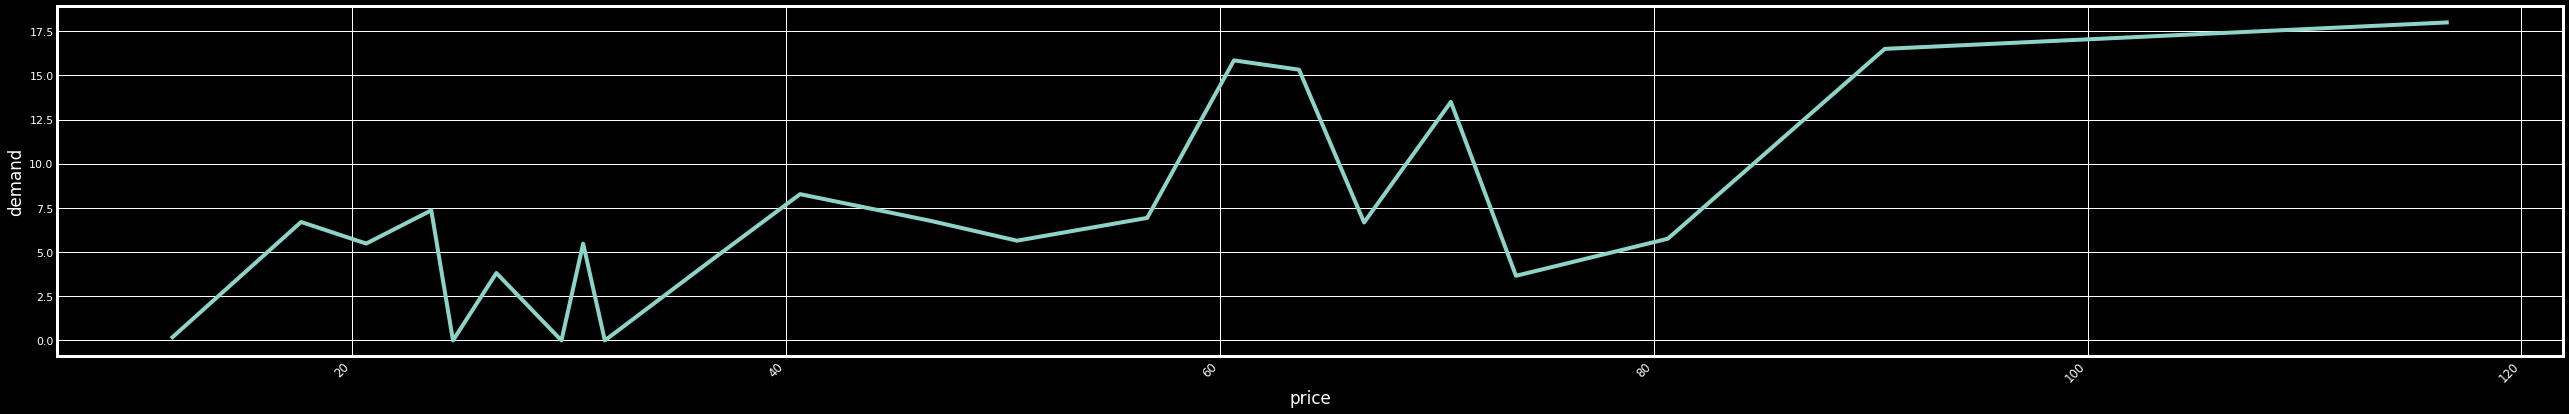

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)


demand_by_day = df_clean[['price','demand','index']].groupby(['price']).mean() #makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'price',y = 'demand', data=demand_by_day)

#The average  demand fluctuates between 2 and 7 as long as the price is less than  60 euros. However, the demand reaches a first peak for a price of 60 euros and another one for 70 euros. Beyond 80 euros the demand keeps increasing. We can explain by the fact that more people buy their ticket when the date of departure is closer, which goes along a rise in the prices.

#Average price evolution as a function of the destination time

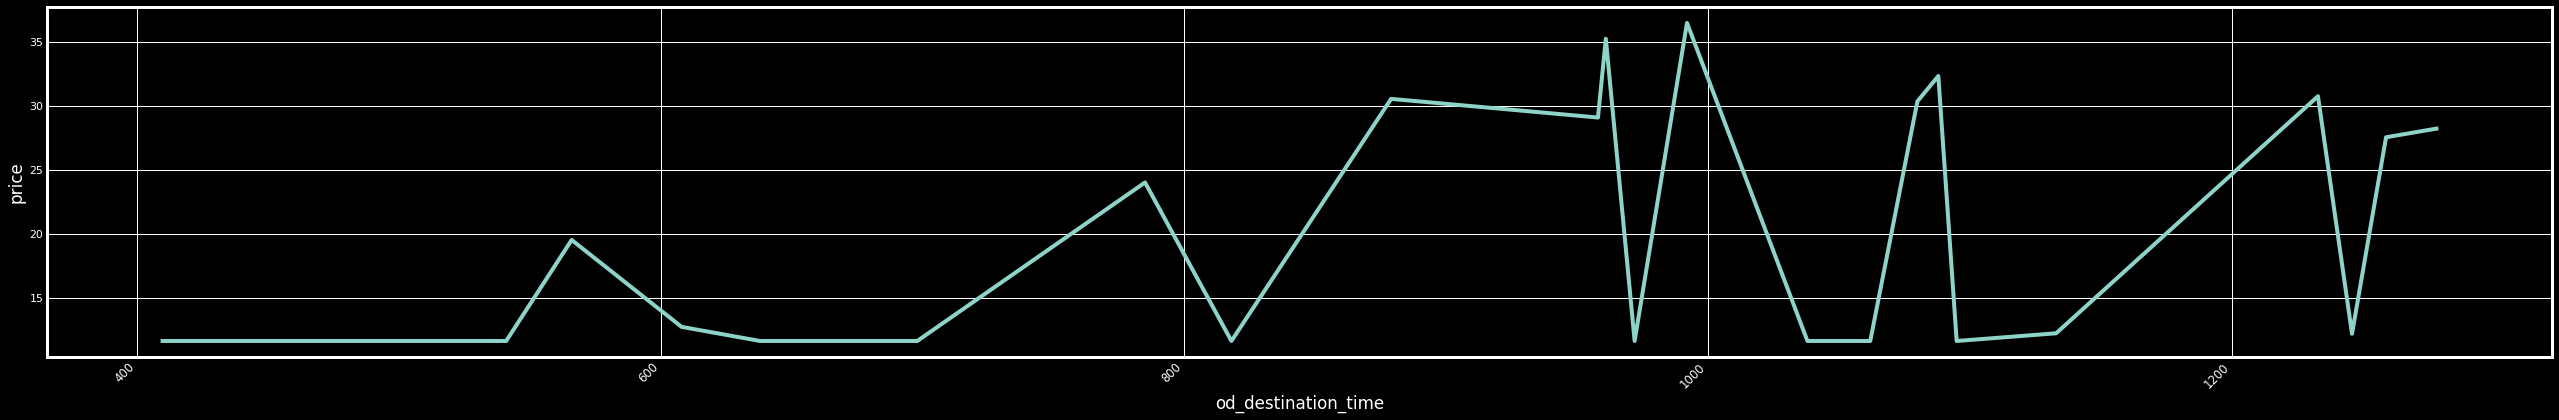

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['od_destination_time','demand','index','price']].groupby(['od_destination_time']).mean()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'od_destination_time',y = 'price', data=demand_by_day)



#Average price evolution as a function of the origin town time

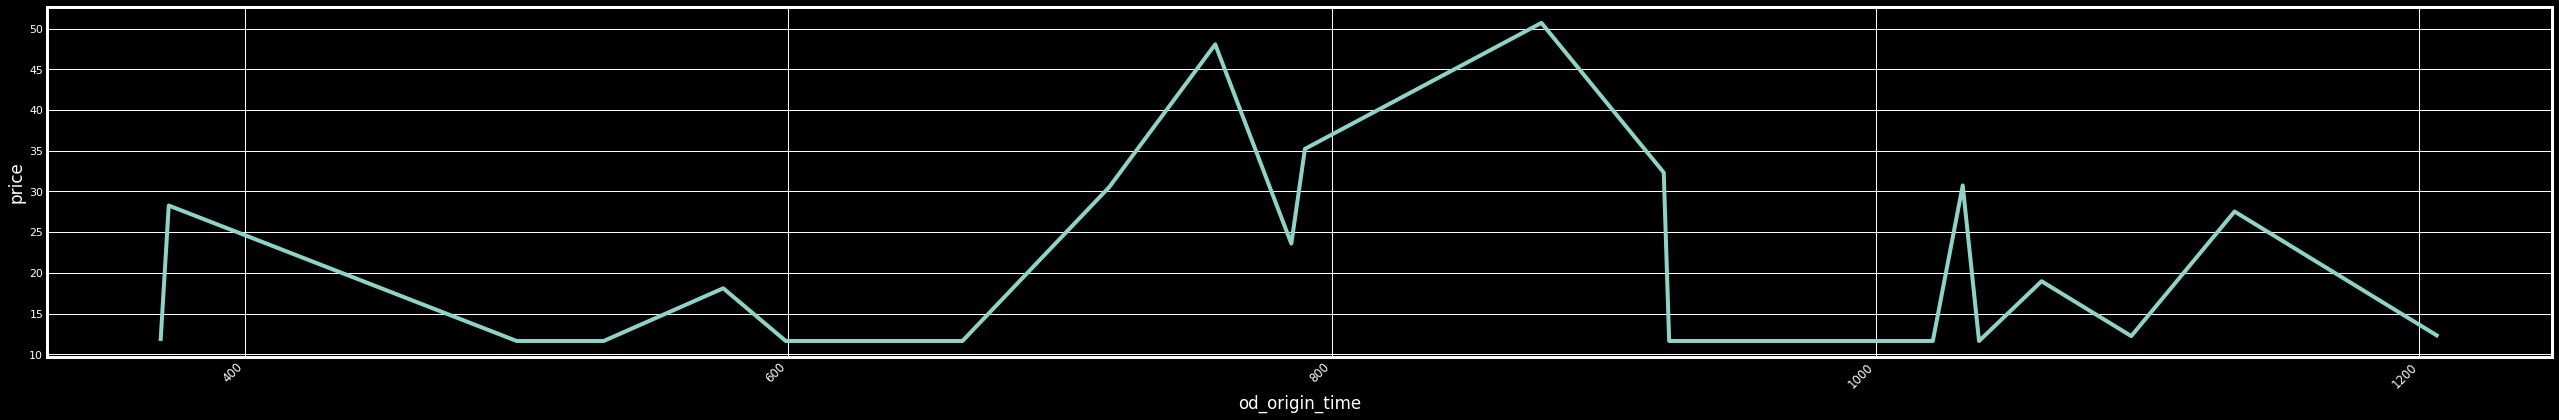

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['od_origin_time','demand','index','price']].groupby(['od_origin_time']).mean()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'od_origin_time',y = 'price', data=demand_by_day)



#The demand amount evolution as function of the number of days remaining to the departure, taking into account the station of departure

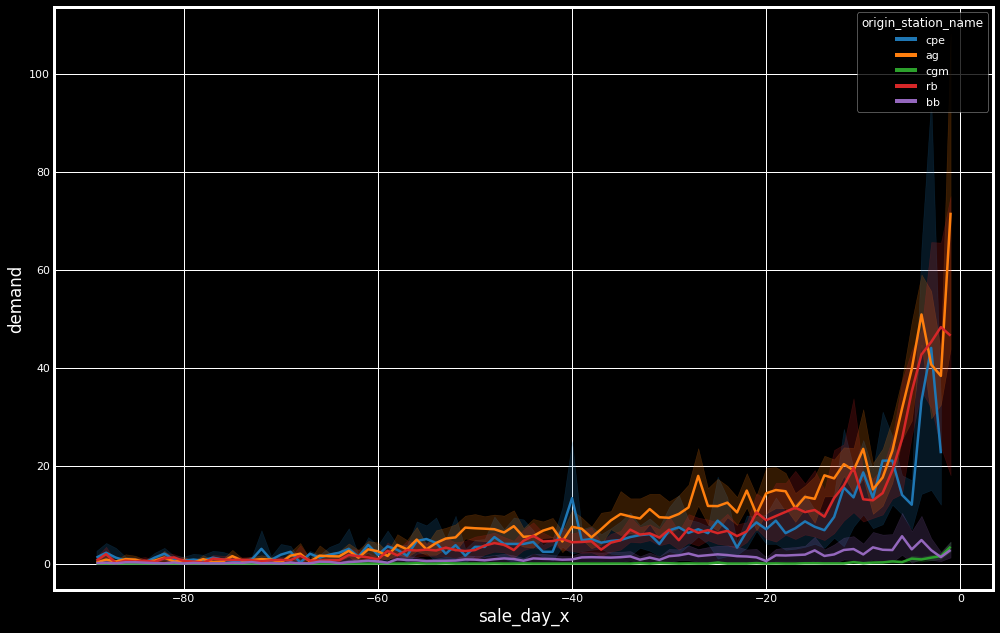

In [ ]:
plt.figure(figsize=(15, 10)) 


sns.lineplot(x='sale_day_x',y='demand',hue='origin_station_name',data=df, palette="tab10", linewidth=2.5)

#The demand amount evolution as function of the number of days remaining to the departure, taking into account the station of destination

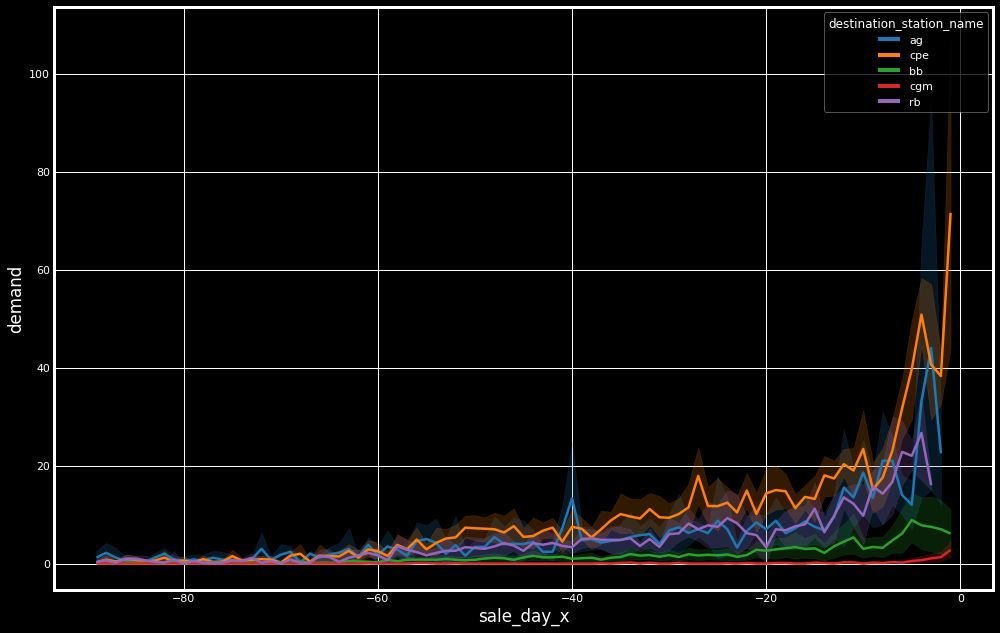

In [ ]:
plt.figure(figsize=(15, 10)) 

sns.lineplot(x='sale_day_x',y='demand',hue='destination_station_name',data=df, palette="tab10", linewidth=2.5)

**On the 2 plots above , demand seems to be higher on some origin train station than other  as the departure date gets closer: for example the demand on ag station, rb, and cpe stations grows strongly up yo 55-70 as time goes, while the demand of bb and cgm remains steady at  about 5 . In the same way, the destination stations ag, cpe, and rb have the most amount of demand.**


#The price  evolution as function of the number of days remaining to the departure, taking into account the station of departure

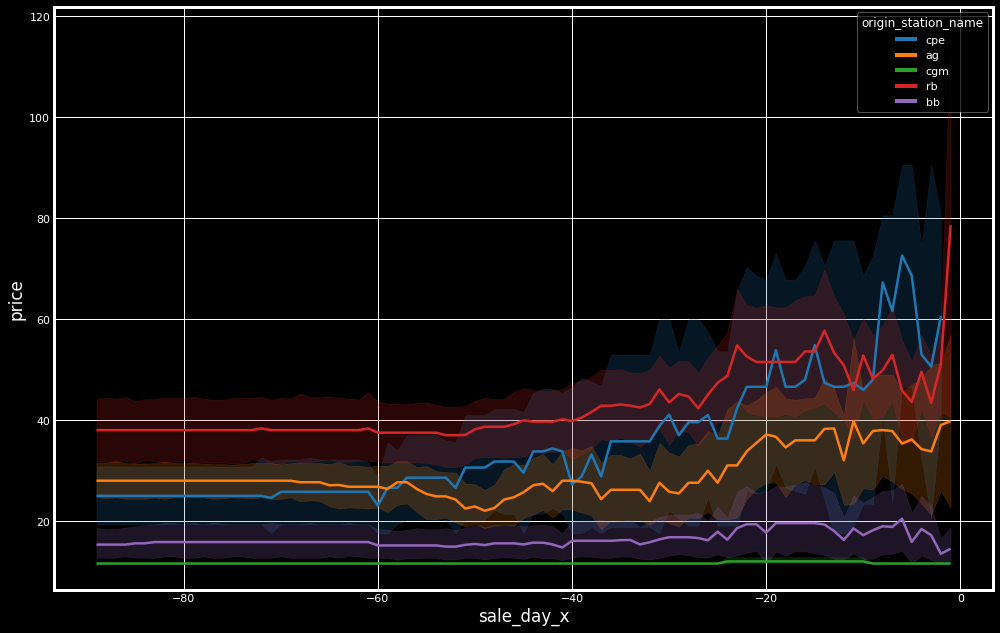

In [ ]:
plt.figure(figsize=(15, 10)) 

sns.lineplot(x='sale_day_x',y='price',hue='origin_station_name',data=df, palette="tab10", linewidth=2.5)

#The price  evolution as function of the number of days remaining to the departure, taking into account the station of destination

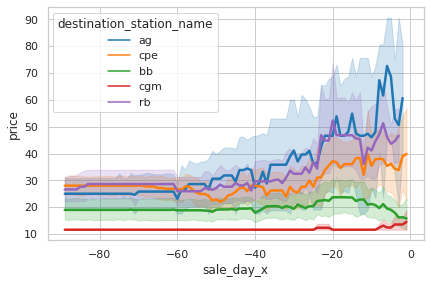

In [ ]:
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='price',hue='destination_station_name',data=df, palette="tab10", linewidth=2.5)

**On the 2 plots above , demand seems to be higher on some origin train station than other  as the departure date gets closer: for example the demand on ag station, rb, and cpe stations grows strongly up yo 55-70 as time goes, while the demand of bb and cgm remains steady at  about 5 . In the same way, the destination stations ag, cpe, and rb have the most amount of demand.**


#The price  evolution as function of the number of days remaining to the departure, taking into account the month of sale

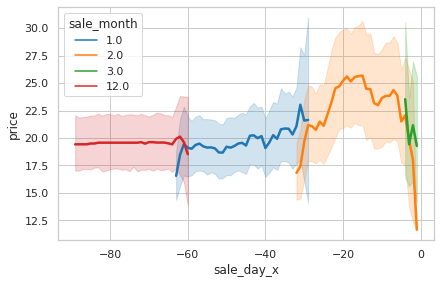

In [ ]:
#Sale_month

sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='price',hue='sale_month',data=df, palette="tab10", linewidth=2.5)

#The demand evolution as function of the number of days remaining to the departure, taking into account the month of sale

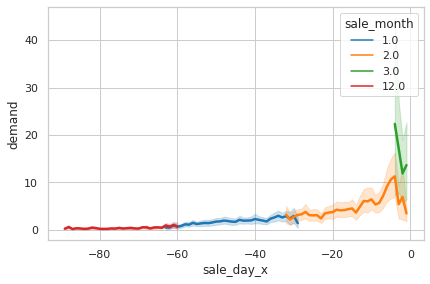

In [ ]:
#Sale_month

sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='demand',hue='sale_month',data=df, palette="tab10", linewidth=2.5)

#The demand evolution as function of the number of days remaining to the departure, taking into account the week of sale feature

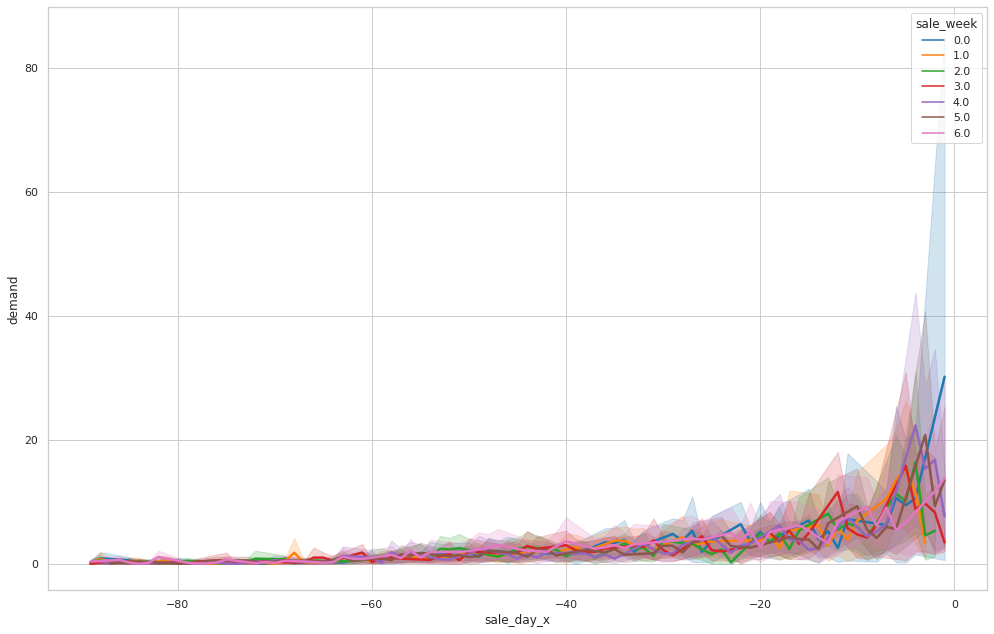

In [ ]:
#Sale_month

plt.figure(figsize=(15, 10)) 
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='demand',hue='sale_week',data=df, palette="tab10", linewidth=2.5)



#The demand evolution as function of the number of days remaining to the departure, taking into account the destination_days_to_next_public_holiday feature

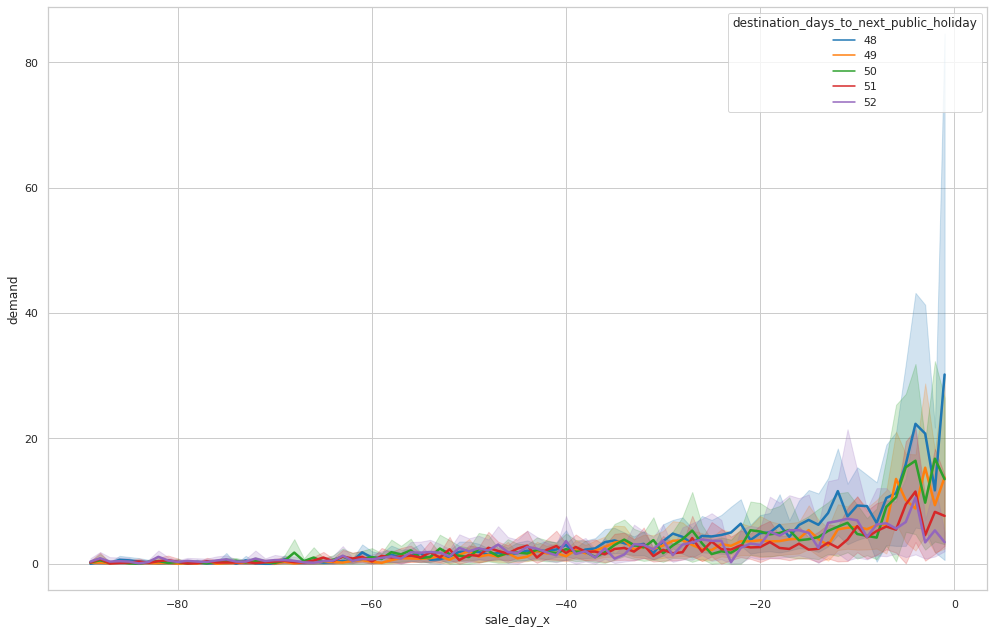

In [ ]:
#Sale_month

plt.figure(figsize=(15, 10)) 
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='demand',hue='destination_days_to_next_public_holiday',data=df, palette="tab10", linewidth=2.5)



#The demand evolution as function of the number of days remaining to the departure, taking into account the week of sale feature

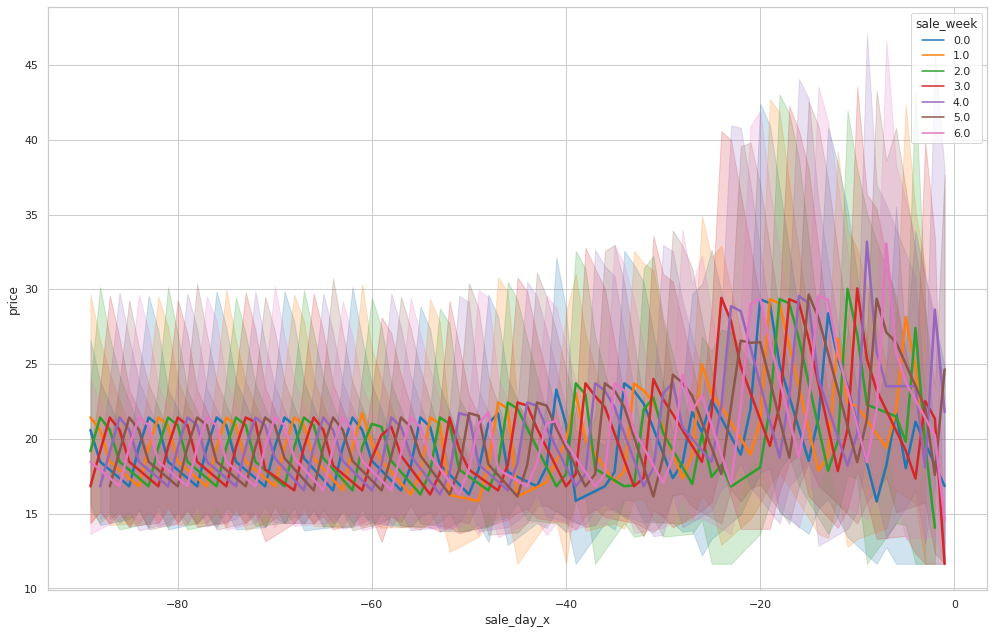

In [ ]:
#Sale_month

plt.figure(figsize=(15, 10)) 
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='price',hue='sale_week',data=df, palette="tab10", linewidth=2.5)



#The price evolution as function of the number of days remaining to the departure, taking into account the destination_days_to_next_public_holiday feature

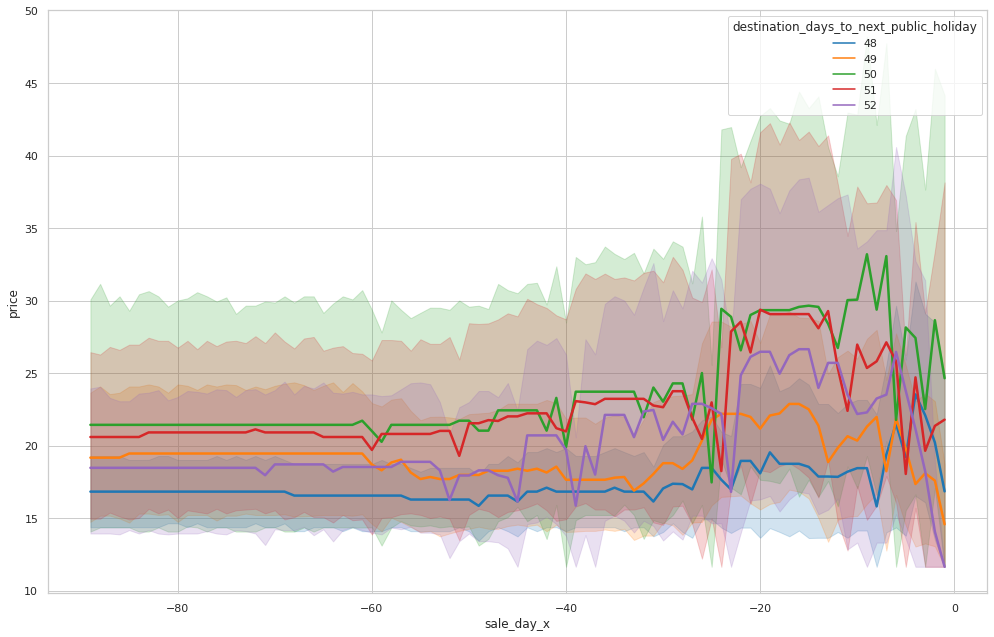

In [ ]:
#Sale_month

plt.figure(figsize=(15, 10)) 
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='price',hue='destination_days_to_next_public_holiday',data=df, palette="tab10", linewidth=2.5)



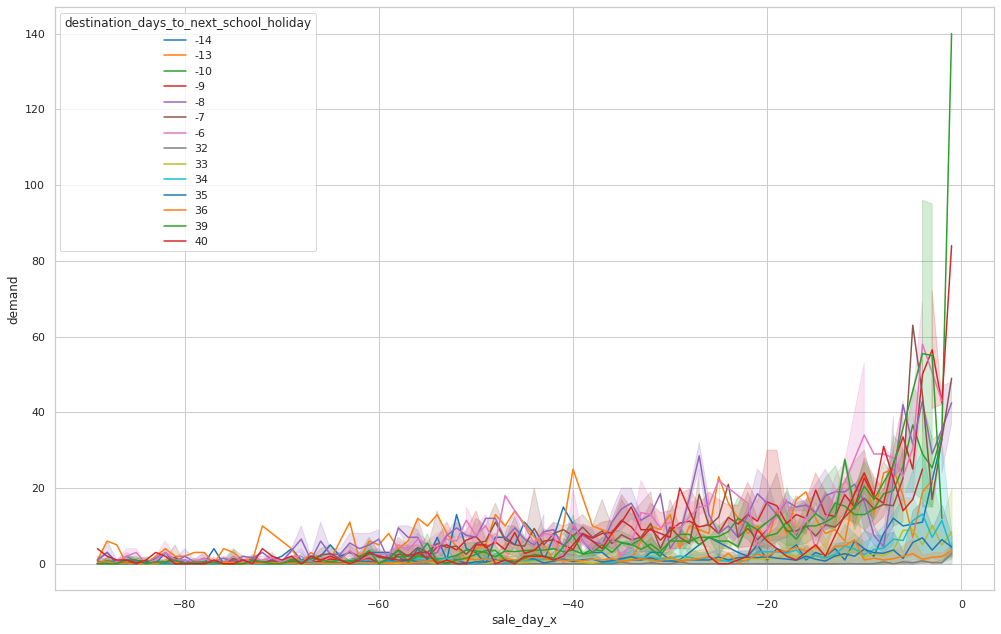

In [ ]:
#Sale_month

plt.figure(figsize=(15, 10)) 
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='demand',hue='destination_days_to_next_school_holiday',data=df, palette="tab10", linewidth=1.5)



#The price evolution as function of the number of days remaining to the departure, taking into account the destination_days_to_next_school_holiday feature

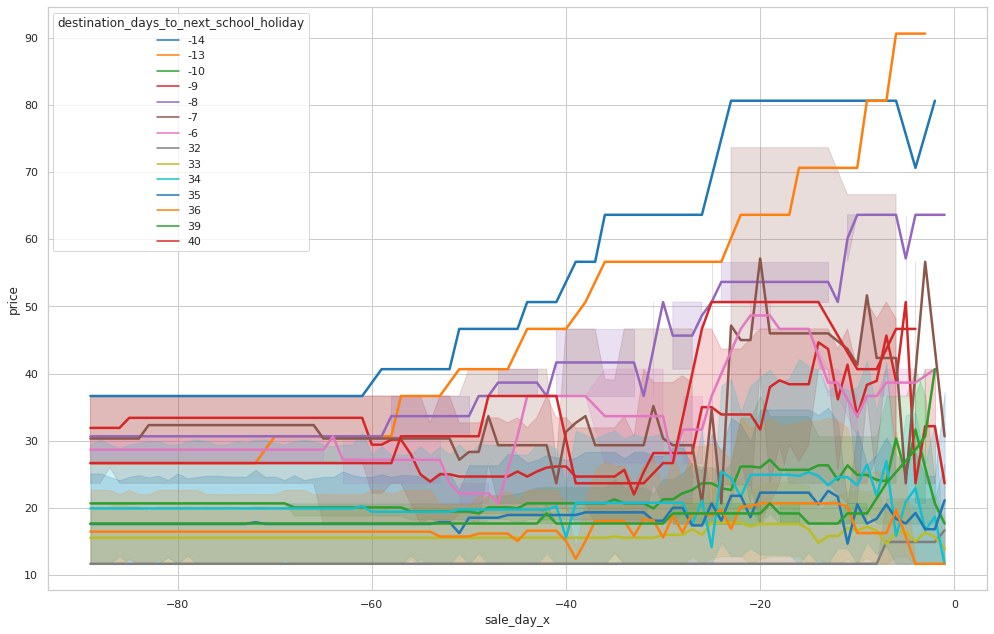

In [ ]:
#Sale_month

plt.figure(figsize=(15, 10)) 
sns.set_theme(style="whitegrid")
sns.lineplot(x='sale_day_x',y='price',hue='destination_days_to_next_school_holiday',data=df, palette="tab10", linewidth=2.5)



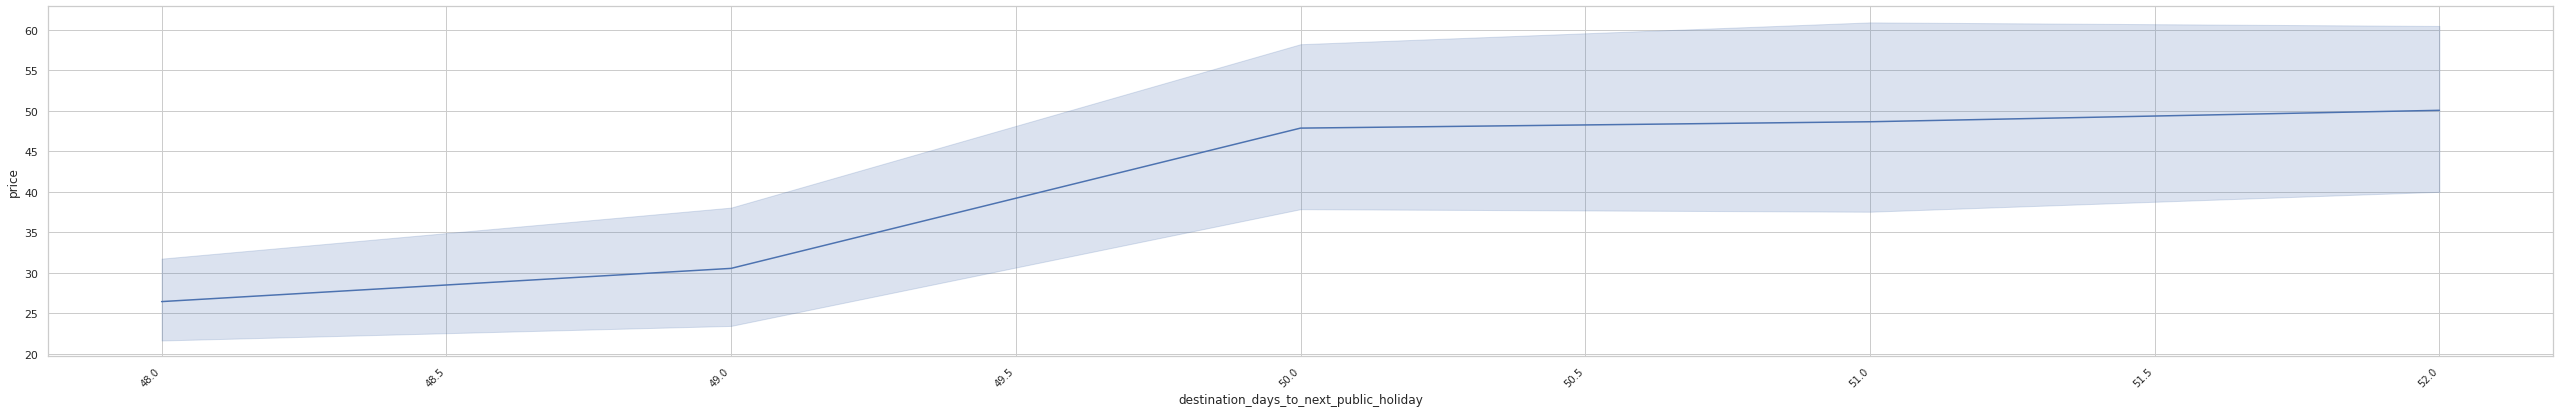

In [ ]:
plt.figure(figsize=(40, 6)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small')
plt.gca().xaxis.grid(True)

demand_by_day = df_clean[['destination_days_to_next_public_holiday','demand','index','price']].groupby(['destination_days_to_next_public_holiday','price']).sum()#kind a makes sense
demand_by_day = demand_by_day.reset_index()
sns.lineplot(x = 'destination_days_to_next_public_holiday',y = 'price', data=demand_by_day)



#Random grid search for Random Forest classifier